In [1]:
#!pip install trafilatura

In [2]:
import os

import numpy as np
import pandas as pd

from lxml import html
from bs4 import BeautifulSoup
import trafilatura

In [3]:
#!npx degit kelu124/substack/.archive substack --force

In [4]:
files = os.listdir('.archive')
file_names = []
for name in files:
    if not ('type' in name):
        file_names.append(name)

In [5]:
D = pd.read_parquet('articles.parquet.gzip')

In [6]:
DONE = list(D.file_name)

In [7]:
import io

In [8]:
articles = []
errors = []
for file_name in file_names:
    if file_name not in DONE:
        with io.open(f'.archive/{file_name}', mode="r", encoding="utf-8") as f:
            try:
                mytree = html.fromstring("".join(f.readlines()))
            except Exception as e:
                print(e)
                errors.append(file_name)
                continue
            try:
                content = trafilatura.extract(mytree)
                articles.append((file_name, content))
            except Exception as e:
                print(e)
                errors.append(file_name)

'utf-8' codec can't decode byte 0xff in position 0: invalid start byte
'utf-8' codec can't decode byte 0xe2 in position 10: invalid continuation byte
'utf-8' codec can't decode byte 0xff in position 0: invalid start byte
'utf-8' codec can't decode byte 0xff in position 0: invalid start byte
'utf-8' codec can't decode byte 0xff in position 0: invalid start byte
'utf-8' codec can't decode byte 0xff in position 0: invalid start byte
'utf-8' codec can't decode byte 0xff in position 0: invalid start byte
'lxml.etree._Element' object has no attribute 'text_content'
'utf-8' codec can't decode byte 0xff in position 0: invalid start byte
'utf-8' codec can't decode byte 0xe2 in position 10: invalid continuation byte
'utf-8' codec can't decode byte 0xff in position 0: invalid start byte
'utf-8' codec can't decode byte 0xff in position 0: invalid start byte
'utf-8' codec can't decode byte 0xe2 in position 10: invalid continuation byte
'utf-8' codec can't decode byte 0xff in position 0: invalid sta

'lxml.etree._Element' object has no attribute 'text_content'
'utf-8' codec can't decode byte 0xff in position 0: invalid start byte
'utf-8' codec can't decode byte 0xff in position 0: invalid start byte
'utf-8' codec can't decode byte 0x8f in position 10: invalid start byte
'utf-8' codec can't decode byte 0x94 in position 4479: invalid start byte
'utf-8' codec can't decode byte 0xff in position 0: invalid start byte
'utf-8' codec can't decode byte 0xff in position 0: invalid start byte
'utf-8' codec can't decode byte 0x8f in position 10: invalid start byte
'utf-8' codec can't decode byte 0xff in position 0: invalid start byte
'utf-8' codec can't decode byte 0xe2 in position 10: invalid continuation byte
'utf-8' codec can't decode byte 0xe2 in position 10: invalid continuation byte
'utf-8' codec can't decode byte 0xb5 in position 11: invalid start byte
'utf-8' codec can't decode byte 0xe2 in position 10: invalid continuation byte


In [9]:
NEW = pd.DataFrame(articles, columns = ['file_name', 'content'])
NEW["LEN"] = NEW["content"].apply(lambda x: len(str(x)))
NEW

,file_name,content,LEN


In [10]:
len(NEW),len(D)

(0, 1442)

In [11]:
df = pd.concat([NEW,D]).reset_index(drop=True)
len(df)
df

,file_name,content,LEN
0,7fcef9a240c0738d2390c83f9713dc98,Let’s start with the end. If you know anything...,9567
1,c24651d7a89dbc792142e26a99579bfe,There’s a calamity on the horizon if you belie...,2561
2,3aeffd629aa221d55fc9749940af8a4e,Lettre à ma fille de 15 ans\nDécryptage des te...,16587
3,b1f6991b9b718672751c9427c3f5b794,ABSTRACT\nThe nature has myriad plant organism...,3829
4,7e5c1ed5c33c7dbc323cd0264cc94099,"Microsoft’s GitHub Copilot, the automatic code...",2172
...,...,...,...
1437,e8b7faf708568f9f39abe04b778c4631,I would say my efficiency is up ~20% since sta...,14337
1438,b79a2baa87b68283198416791b93bce4,The U.S. government has restricted sales of Nv...,2125
1439,d89d7cc690ceaaafaecc9f40ff8230c5,My kids and I just played D&D with ChatGPT4 as...,34489
1440,69637dcd83c48ebde0610a61a27b1989,The newest Kindle is the first truly new Kindl...,6249


In [12]:
df.to_parquet('articles.parquet.gzip',compression="gzip")

In [13]:
# More testing here about the coherent text that has to be found, find upper elements if p doesn't mention classes. 
# or merge everything than clean up.


In [14]:
df = pd.read_parquet('articles.parquet.gzip')
df

,file_name,content,LEN
0,7fcef9a240c0738d2390c83f9713dc98,Let’s start with the end. If you know anything...,9567
1,c24651d7a89dbc792142e26a99579bfe,There’s a calamity on the horizon if you belie...,2561
2,3aeffd629aa221d55fc9749940af8a4e,Lettre à ma fille de 15 ans\nDécryptage des te...,16587
3,b1f6991b9b718672751c9427c3f5b794,ABSTRACT\nThe nature has myriad plant organism...,3829
4,7e5c1ed5c33c7dbc323cd0264cc94099,"Microsoft’s GitHub Copilot, the automatic code...",2172
...,...,...,...
1437,e8b7faf708568f9f39abe04b778c4631,I would say my efficiency is up ~20% since sta...,14337
1438,b79a2baa87b68283198416791b93bce4,The U.S. government has restricted sales of Nv...,2125
1439,d89d7cc690ceaaafaecc9f40ff8230c5,My kids and I just played D&D with ChatGPT4 as...,34489
1440,69637dcd83c48ebde0610a61a27b1989,The newest Kindle is the first truly new Kindl...,6249


In [15]:
# Removing unaccessible articles
df = df[~(df['content'] == "Please switch to a supported browser to continue using twitter.com. You can see a list of supported browsers in our Help Center.\nHelp Center\nTerms of Service\nPrivacy Policy\nCookie Policy\nImprint\nAds info\n© 2022 Twitter, Inc.")]
df = df[df.LEN >= 1500]
df

,file_name,content,LEN
0,7fcef9a240c0738d2390c83f9713dc98,Let’s start with the end. If you know anything...,9567
1,c24651d7a89dbc792142e26a99579bfe,There’s a calamity on the horizon if you belie...,2561
2,3aeffd629aa221d55fc9749940af8a4e,Lettre à ma fille de 15 ans\nDécryptage des te...,16587
3,b1f6991b9b718672751c9427c3f5b794,ABSTRACT\nThe nature has myriad plant organism...,3829
4,7e5c1ed5c33c7dbc323cd0264cc94099,"Microsoft’s GitHub Copilot, the automatic code...",2172
...,...,...,...
1436,3fbb11d6e949d1e662aa6a146bb6cda0,China’s growing number of insomniacs are turni...,2859
1437,e8b7faf708568f9f39abe04b778c4631,I would say my efficiency is up ~20% since sta...,14337
1438,b79a2baa87b68283198416791b93bce4,The U.S. government has restricted sales of Nv...,2125
1439,d89d7cc690ceaaafaecc9f40ff8230c5,My kids and I just played D&D with ChatGPT4 as...,34489


In [16]:
df.describe()

,LEN
count,1143.000000
mean,11679.916010
std,20709.491506
min,1505.000000
25%,3856.500000
50%,6854.000000
75%,13052.000000
max,496896.000000


In [17]:
# TF-IDF Feature Generation
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.tokenize import RegexpTokenizer

# Initialize regex tokenizer
tokenizer = RegexpTokenizer(r'\w+')

# # Vectorize document using TF-IDF
tf_idf_vect = TfidfVectorizer(lowercase=True,
                        stop_words='english',
                        ngram_range = (1,2),
                        tokenizer = tokenizer.tokenize)

# Fit and Transfrom Text Data
X_train_counts = tf_idf_vect.fit_transform(df['content'])

# Check Shape of Count Vector
X_train_counts.shape

(1143, 967141)

In [18]:
X_train_counts[0]

<1x967141 sparse matrix of type '<class 'numpy.float64'>'
	with 1513 stored elements in Compressed Sparse Row format>

In [19]:
from sklearn.cluster import KMeans

# Create Kmeans object and fit it to the training data 
kmeans = KMeans(n_clusters=10).fit(X_train_counts)

# Get the labels using KMeans
pred_labels = kmeans.labels_

RuntimeError: unusual file processing time, aborting

Exception ignored in: 'sklearn.cluster._k_means_common._relocate_empty_clusters_sparse'
Traceback (most recent call last):
  File "<__array_function__ internals>", line 2, in where
  File "/home/kelu/.local/lib/python3.10/site-packages/trafilatura/core.py", line 978, in timeout_handler
    raise RuntimeError('unusual file processing time, aborting')
RuntimeError: unusual file processing time, aborting


In [20]:
# Import WordCloud and STOPWORDS
from wordcloud import WordCloud
from wordcloud import STOPWORDS
# Import matplotlib
import matplotlib.pyplot as plt 


def word_cloud(text,wc_title,wc_file_name='wordcloud.jpeg'):
    # Create stopword list
    stopword_list = set(STOPWORDS) 

    # Create WordCloud 
    word_cloud = WordCloud(width = 800, height = 500, 
                           background_color ='white', 
                           stopwords = stopword_list, 
                           min_font_size = 14).generate(text) 

    # Set wordcloud figure size
    plt.figure(figsize = (8, 6)) 
    
    # Set title for word cloud
    plt.title(wc_title)
    
    # Show image
    plt.imshow(word_cloud) 

    # Remove Axis
    plt.axis("off")  

    # save word cloud
    # plt.savefig(wc_file_name,bbox_inches='tight')

    # show plot
    plt.show()

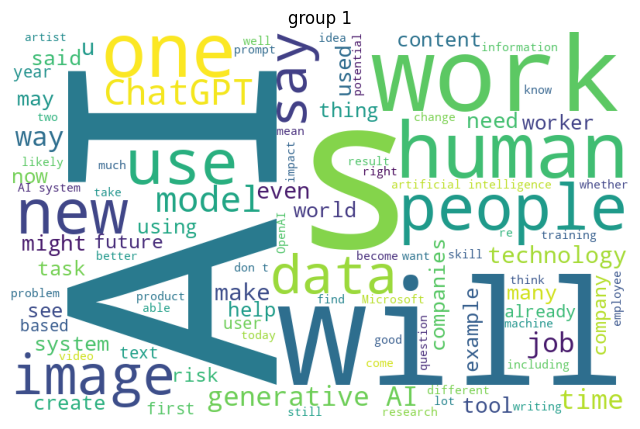

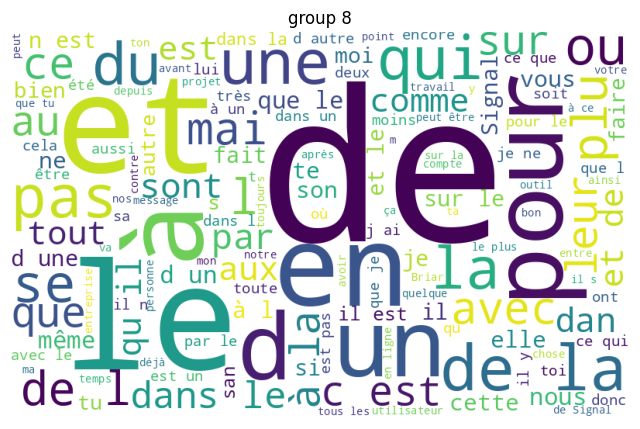

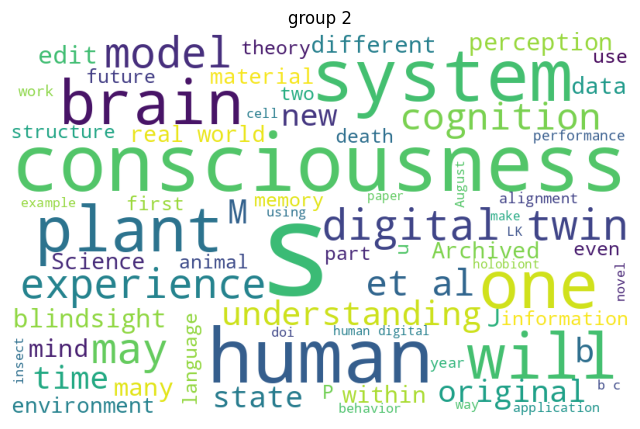

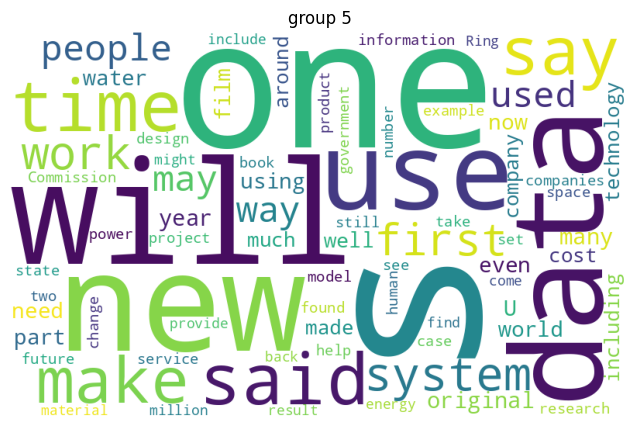

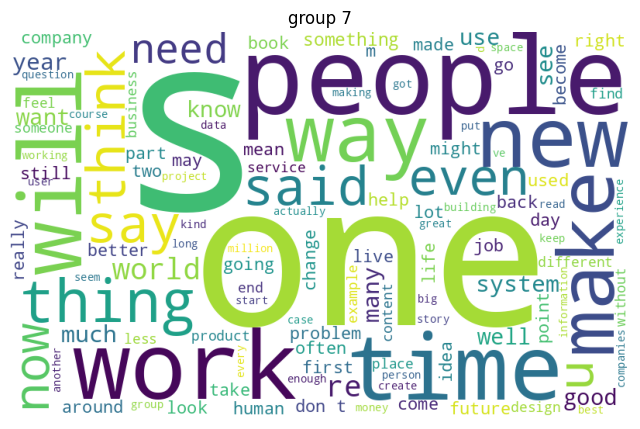

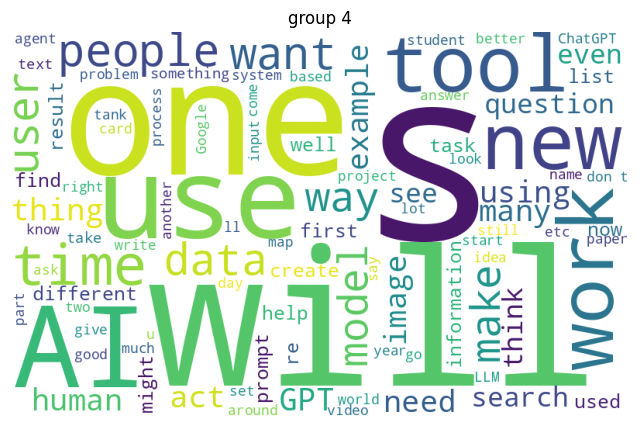

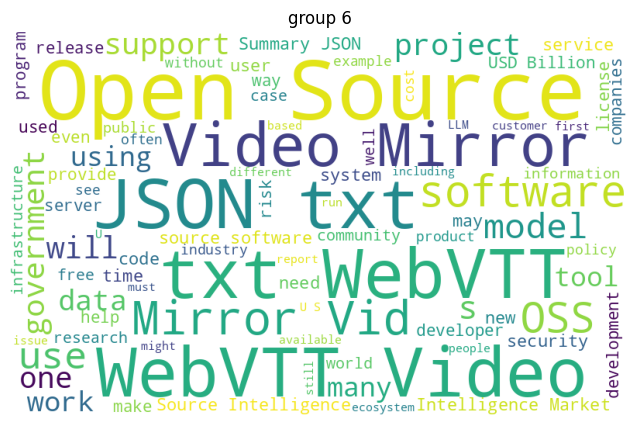

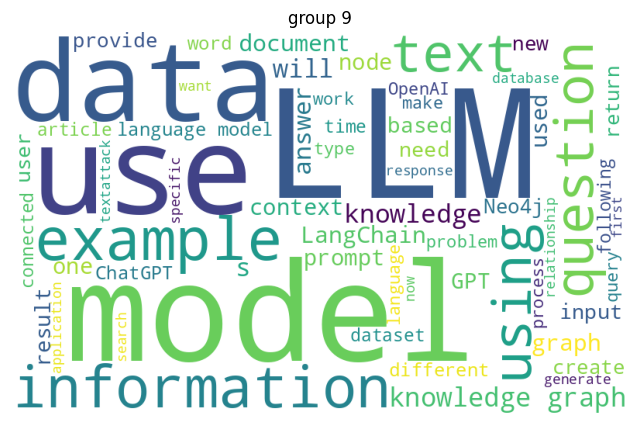

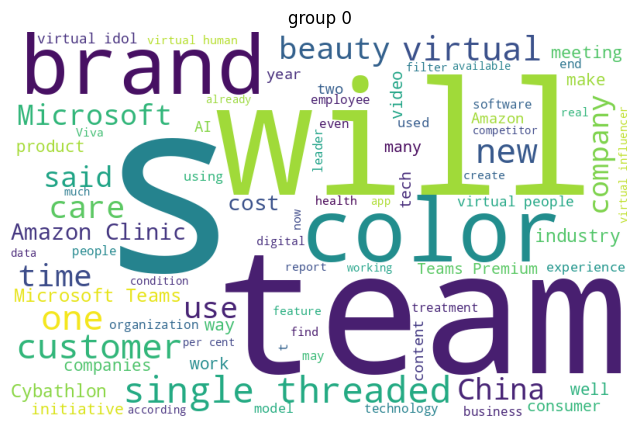

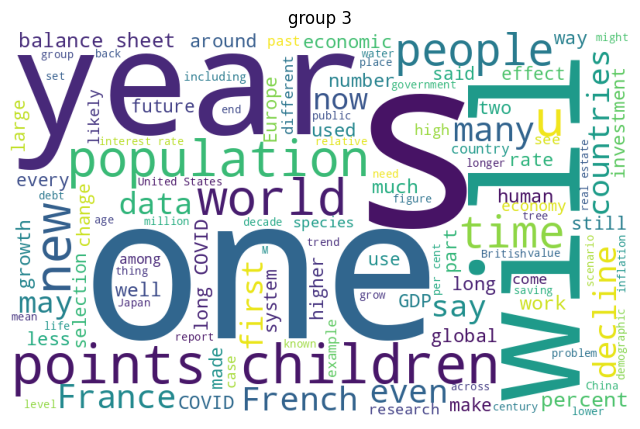

In [21]:
import pandas as pd
new_df=pd.DataFrame({"text":df['content'],"labels":pred_labels})


for i in new_df.labels.unique():
    new_new_df=new_df[new_df.labels==i]
    text="".join(new_new_df.text.tolist())
    word_cloud(text,f"group {i}",f'{i}.jpeg')

In [22]:
# new_df includes the category for errord ones as well.
# No context is given, so the group name is default to the group number.
# We can use the common words found in each group to formulate a title?
new_df.to_csv('grouped_articles.csv')

In [23]:
new_df

,text,labels
0,Let’s start with the end. If you know anything...,1
1,There’s a calamity on the horizon if you belie...,1
2,Lettre à ma fille de 15 ans\nDécryptage des te...,8
3,ABSTRACT\nThe nature has myriad plant organism...,2
4,"Microsoft’s GitHub Copilot, the automatic code...",1
...,...,...
1436,China’s growing number of insomniacs are turni...,5
1437,I would say my efficiency is up ~20% since sta...,4
1438,The U.S. government has restricted sales of Nv...,5
1439,My kids and I just played D&D with ChatGPT4 as...,5
